<a href="https://colab.research.google.com/github/yumi-jun/Data_Analysis/blob/main/%ED%95%98%EC%9D%B4%EB%B8%8C%EB%A6%AC%EB%93%9C_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=589380e33d935a94e12d02faebaa98a470eb884f3936b357565659cb4bcac4bb
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


(15, 15)
Outlier nodes (distance > 0.95): [[ 2  3]
 [ 2 10]]


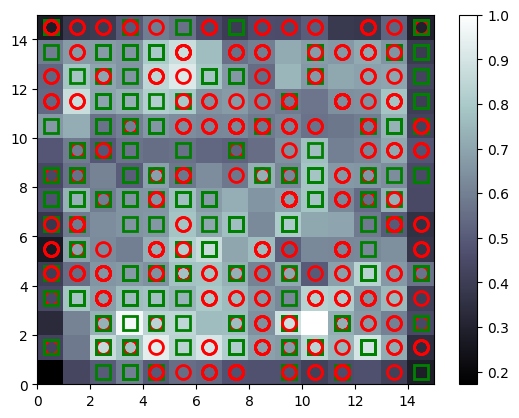

Number of potential frauds: 16
(16, 15)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

dataset = pd.read_csv('Credit_Card_Applications.csv')


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)


np.random.seed(42)

som = MiniSom(x=15, y=15, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=100)


bone()
distance_map = som.distance_map().T
pcolor(distance_map)
colorbar()

print(distance_map.shape)


threshold = 0.95
outlier_nodes = np.argwhere(distance_map > threshold)
print(f'Outlier nodes (distance > {threshold}): {outlier_nodes}')


markers = ['o', 's']
colors = ['r', 'g']


for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[i])],
         markeredgecolor=colors[int(y[i])], markerfacecolor='None',
         markersize=10, markeredgewidth=2)
show()


mappings = som.win_map(X_scaled)

frauds = []
for node in outlier_nodes:
    node = tuple(node)
    if node in mappings:
        frauds.append(mappings[node])

if frauds:
    frauds = np.concatenate(frauds, axis=0)
    frauds_original = scaler.inverse_transform(frauds)
    print(f'Number of potential frauds: {frauds_original.shape[0]}')
    print(frauds_original.shape)
else:
    print("No data points found for the specified nodes.")


fraud_customer_ids = frauds_original[:, 0].astype(int)


is_fraud = np.zeros(len(dataset))


for i in range(len(dataset)):
    if int(dataset.iloc[i, 0]) in fraud_customer_ids:
        is_fraud[i] = 1

print(is_fraud)



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

customers = dataset.iloc[:, 1:].values
sc=StandardScaler()
customers=sc.fit_transform(customers)


In [31]:
from keras.models import Sequential
from keras.layers import Dense

classifier=Sequential()
classifier.add(Dense(units=2,kernel_initializer='uniform',activation='relu',input_dim=15))
classifier.add(Dense(units=2,kernel_initializer='uniform',activation='relu',input_dim=15))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


classifier.fit(customers,is_fraud,batch_size=1,epochs=5)

Epoch 1/5
690/690 [==============================] - 2s 2ms/step - loss: 0.5714 - accuracy: 0.9580
Epoch 2/5
690/690 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.9580
Epoch 3/5
690/690 [==============================] - 1s 2ms/step - loss: 0.3085 - accuracy: 0.9580
Epoch 4/5
690/690 [==============================] - 2s 3ms/step - loss: 0.2554 - accuracy: 0.9580
Epoch 5/5
690/690 [==============================] - 3s 4ms/step - loss: 0.2244 - accuracy: 0.9580


In [32]:
y_pred=classifier.predict(customers)

y_pred=np.concatenate((dataset.iloc[:,0:1],y_pred),axis=1)
y_pred=y_pred[y_pred[:,1].argsort()]
print(y_pred)

22/22 [==============================] - 0s 1ms/step
[[1.57761560e+07 1.22677758e-01]
 [1.56273650e+07 1.22677758e-01]
 [1.57484990e+07 1.22677758e-01]
 ...
 [1.56999630e+07 1.22677758e-01]
 [1.57933660e+07 1.22677758e-01]
 [1.55924120e+07 1.22677758e-01]]
